In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
%matplotlib inline

In [7]:
#### Perceptron class to build an object of a perceptron, where we can define #inputs , thresholds , learning_rate
#### Here I assign random initial weights for each perceptron. in each iteration the weights multiply by weights and then 
#### sum up with bias if the result is greater than 0 the node get active otherwise it turns off.

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        
        self.threshold = threshold     #maximum number of repetation
        self.learning_rate = learning_rate
        self.weights = np.random.normal(size=(no_of_inputs + 1))  # weights for (inputs and a bias)
        self.count = 0   # to count the number of repetation before getting the final result
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] # multiplying weights to the inputs and adding the bias
        if summation > 0:          # deciding to turn the perceptron on or off
            activation = 1
        else:
            activation = 0
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            temp = np.copy(self.weights)
        
            self.count += 1             #updating the number of repetation
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                
                self.weights[1:] += (self.learning_rate * (label - prediction) * inputs) #updating the weights
                self.weights[0] += (self.learning_rate * (label - prediction))    #updating the bias

            if np.array_equal(temp,self.weights)==1 :   # if there is no change in the weights(convergence) stop and return the result
                break


### Let's see how it works on some example

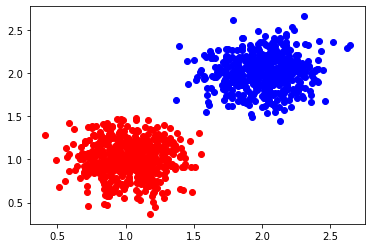

In [16]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
centers = [[1, 1],  [2,2]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.2)
 
#plt.scatter(X[:,0], X[:,1])
reds = y == 0
blues = y == 1

plt.scatter(X[reds,0], X[reds,1],c='red')
plt.scatter(X[blues,0], X[blues,1],c='blue')

### we have 2 clusters lets feed it to our perceptron and see if it could seprate them

In [20]:
perc = Perceptron(no_of_inputs=2,threshold=2000,learning_rate=0.001)
perc.train(X,y)
perc.weights

array([-0.17894871,  0.00511847,  0.11655861])

In [21]:
print('Number of iteration to converge is: ',perc.count)

Number of iteration to converge is:  26


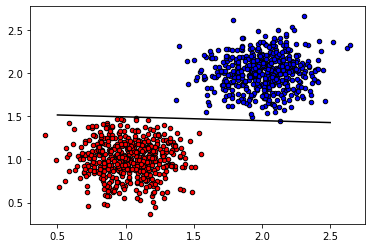

In [22]:
#m = perc.weights[2]/perc.weights[1]
plt.plot((0.5 ,2.5) , ((-(perc.weights[1]*0.5 + perc.weights[0])/perc.weights[2])
                     ,((-(perc.weights[1]*2.5 + perc.weights[0])/perc.weights[2]))),'k-')
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')

In [13]:
prediction = []
for i in range(len(X)):
    prediction.append(perc.predict([X[i,0],X[i,1]]))
print("Accuracy is equal to=",(np.sum(prediction == y)/len(X))*100,'%')

Accuracy is equal to= 100.0 %
